# **Classification Trees in Python, From Start To Finish**

*[Based on Coursera Project Network : Classification Trees in Python, From Start To Finish](https://www.coursera.org/learn/classification-trees-in-python/home/welcome)*


*by Abdurrahman Shiddiq Thaha*

*October 2020*

---

## Content

1. Business Understanding 
    * Objective
    * Description
2. Data Understanding
    * Import Libraries
    * Load data
3. Data Preparation
    * Dealing with missing data
    * Data Formating
4. Modeling and Evaluation

# 1. Business Understanding

## 1.1 Objective
predict whether or not a patient has heart disease.

## 1.2 Description
In this lesson i will use scikit-learn and Cost Complexity Pruning to build a Classification Tree, which uses continuous and categorical data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) to predict whether or not a patient has [heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

I will:

* Import Data from a File
* Identify and Deal with Missing Data
* Format the data for Decision Trees
* Build a Preliminary Classification Tree
* Use Cost Complexity Pruning to improve the Tree
* Build, Evaluate, Draw and Interpret a final Tree


# 2. Data Understanding

## 2.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# sets the style for the plotting
plt.style.use('seaborn-dark')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold

# to execute all of the syntaxes given in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

## 2.2 Load Data

We will use just 1 dataset and only 14 attributes. A description for what each of these files contain is given below:


**processed.cleveland.data**: this database is the only one that has been used by ML researchers to
this date among the other databases.

### **Data Description**

processed.cleveland.data

   - **age**, **Float**
   - **sex** - **Category**
      - 0 = female
      - 1 = male
   - **cp**, chest pain, **Category**
      - 1 = typical angina,
      - 2 = atypical angina,
      - 3 = non-anginal pain,
      - 4 = asymptomatic
   - **restbp**, resting blood pressure (in mm Hg), **Float**
   - **chol**, serum cholesterol in mg/dl, **Float**
   - **fbs**, fasting blood sugar, **Category**
      - 0 = >=120 mg/dl
      - 1 = <120 mg/dl
   - **restecg**, resting electrocardiographic results, **Category**
      - 1 = normal
      - 2 = having ST-T wave abnormality
      - 3 = showing probable or definite left ventricular hypertrophy
   - **thalach**,  maximum heart rate achieved, **Float**
   - **exang**, exercise induced angina, **Category**
      - 0 = no
      - 1 = yes
   - **oldpeak**, ST depression induced by exercise relative to rest. **Float**
   - **slope**, the slope of the peak exercise ST segment, **Category**
      - 1 = upsloping
      - 2 = flat
      - 3 = downsloping
   - **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
   - **thal**, thalium heart scan, **Category**
      - 3 = normal (no cold spots)
      - 6 = fixed defect (cold spots during rest and exercise)
      - 7 = reversible defect (when cold spots only appear during exercise)
   - **hd** : diagnosis of heart disease, the predicted attribute
       * 0 : < 50% diameter narrowing
       * 1 : > 50% diameter narrowing
    

In [2]:
df = pd.read_csv('data/processed.cleveland.data', header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = ['age', 
              'sex', 
              'cp', 
              'restbp', 
              'chol', 
              'fbs', 
              'restecg', 
              'thalach', 
              'exang', 
              'oldpeak', 
              'slope', 
              'ca', 
              'thal', 
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
len(df)

303

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


# 3. Data Preparation

## 3.1 Dealing with missing data

In [7]:
df['ca'].value_counts()

df['thal'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [8]:
df.drop(df[(df['ca'] == '?') | (df['thal'] == '?')].index, inplace=True)

In [9]:
len(df)

297

## 3.2 Formating the data

In [10]:
X = df.drop('hd', axis=1).copy()
X.head(2)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0


In [34]:
y = df['hd'].map(lambda x: 1 if x > 0 else 0)
y.head()

0    0
1    1
2    1
3    0
4    0
Name: hd, dtype: int64

#### one-hot incoding

In [35]:
categorical_features = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'restbp', 'chol', 'thalach', 'oldspeak', 'ca']

In [36]:
X_encoded = pd.get_dummies(X, columns=categorical_features)
X_encoded.head(2)

,age,sex,restbp,chol,thalach,oldpeak,ca,cp_1.0,cp_2.0,cp_3.0,...,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,150.0,2.3,0.0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,108.0,1.5,3.0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


#### Splitting the data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=3)

In [38]:
y_test

84     0
31     1
38     1
25     0
263    0
      ..
197    0
40     1
218    0
282    1
189    1
Name: hd, Length: 75, dtype: int64

# Modeling and Evaluation

#### build a decision tree model

In [39]:
clf_dt = DecisionTreeClassifier(random_state=3).fit(X_train, y_train)

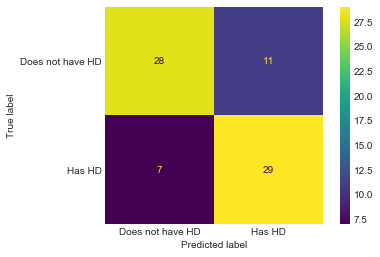

In [40]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['Does not have HD', 'Has HD']);

#### Cost complexity Pruning

In [45]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clf_dts.append(clf_dt)

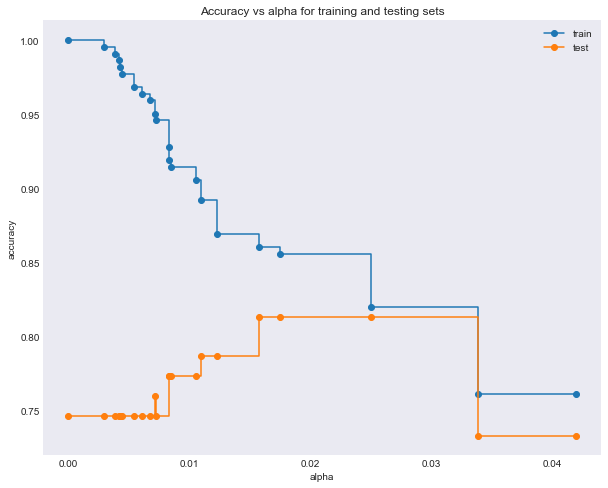

In [50]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show();

#### Cross validation

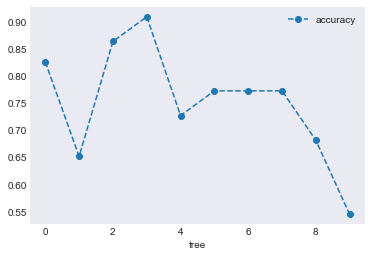

In [65]:
clf_dt = DecisionTreeClassifier(random_state=3, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--');

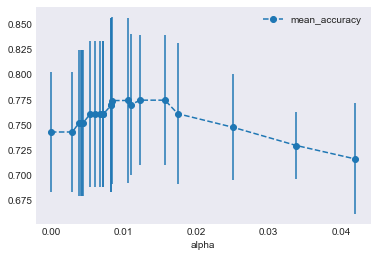

In [71]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=3, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--');

In [106]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.0075) & (alpha_results['alpha'] < 0.015)].sort_values(by='mean_accuracy').reset_index().iloc[0]['alpha']

ideal_ccp_alpha

0.008319897058287146

#### Evaluating the best decision tree

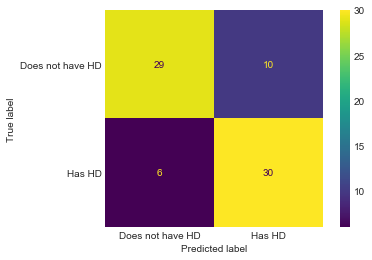

In [108]:
clf_dt_pruned = DecisionTreeClassifier(random_state=3, 
                                       ccp_alpha=ideal_ccp_alpha);
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) ;
_ = plot_confusion_matrix(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

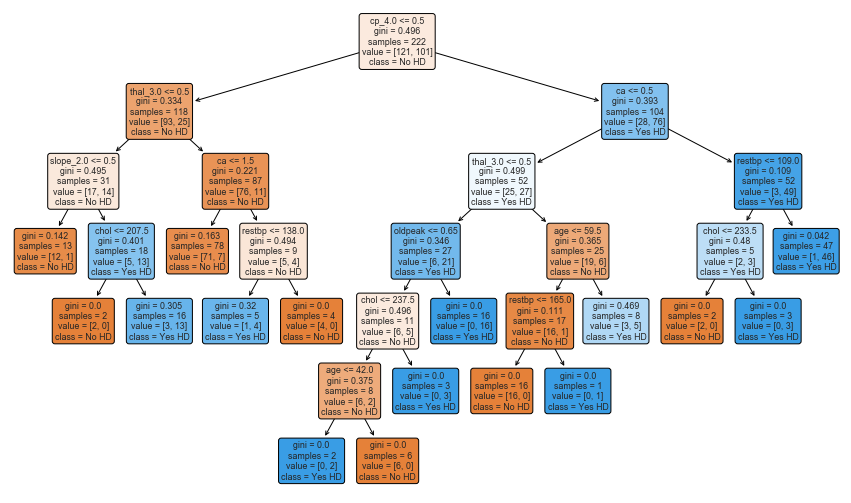

In [112]:
plt.figure(figsize=(15,9))
plot_tree(clf_dt_pruned, 
          filled=True, 
          rounded=True, 
          class_names=["No HD", "Yes HD"], 
          feature_names=X_encoded.columns);